In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import yfinance as yf

In [3]:
data = yf.download(tickers='CAREERP.NS', period='100d', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,155.000000,169.000000,154.050003,166.050003,166.050003,193549
2021-09-27,168.699997,174.000000,167.199997,167.899994,167.899994,175925
2021-09-28,166.600006,167.550003,160.699997,162.350006,162.350006,61883
2021-09-29,161.449997,166.949997,161.050003,163.800003,163.800003,61761
2021-09-30,163.000000,165.500000,162.000000,162.250000,162.250000,26941
...,...,...,...,...,...,...
2022-02-10,132.050003,134.949997,132.050003,133.199997,133.199997,8305
2022-02-11,132.300003,132.850006,130.000000,130.449997,130.449997,22486
2022-02-14,133.000000,133.000000,125.000000,125.750000,125.750000,21725


In [4]:
data.rename(columns = {'Adj Close':'value'}, inplace = True)

In [5]:
data.head()

,Open,High,Low,Close,value,Volume
Date,,,,,,
2021-09-24,155.000000,169.000000,154.050003,166.050003,166.050003,193549
2021-09-27,168.699997,174.000000,167.199997,167.899994,167.899994,175925
2021-09-28,166.600006,167.550003,160.699997,162.350006,162.350006,61883
2021-09-29,161.449997,166.949997,161.050003,163.800003,163.800003,61761
2021-09-30,163.000000,165.500000,162.000000,162.250000,162.250000,26941


In [6]:
data.reset_index(level=0, inplace=True)

In [7]:
data.drop(['Date','Open',	'High',	'Low',	'Close','Volume'], axis=1, inplace=True)

In [8]:
data

,value
0,166.050003
1,167.899994
2,162.350006
3,163.800003
4,162.250000
...,...
95,133.199997
96,130.449997
97,125.750000
98,125.750000


## Checking whether a time series a  stationary or not 

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.834712
p-value: 0.363369


P value is greater than 0.05 means we can't reject null hypothesis, we need to do differencing to make TS a stationary

In [10]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

Performing 1st ,2nd and 3rd order differencing

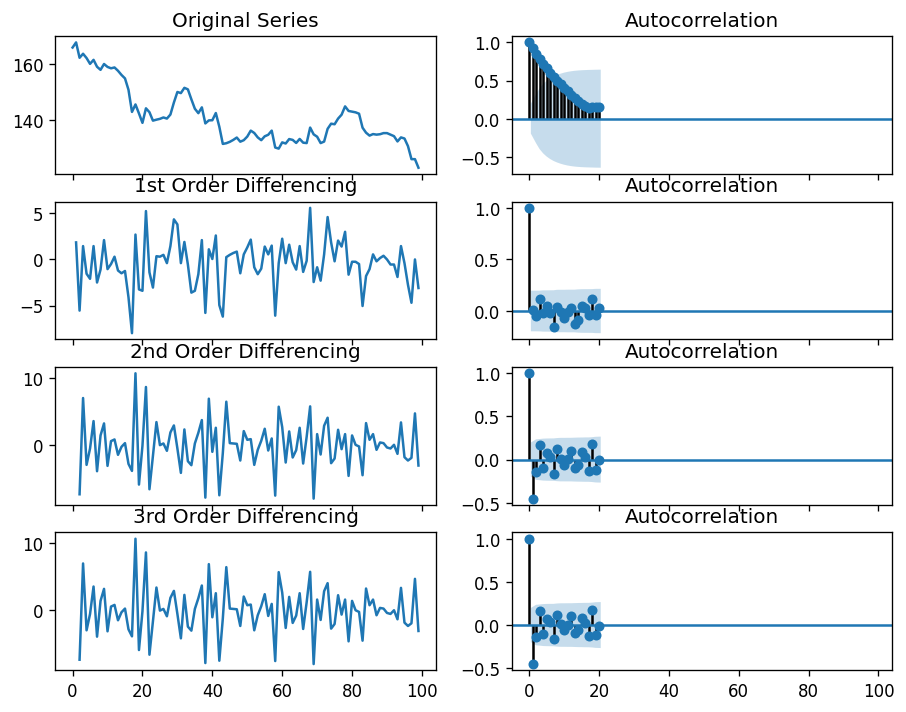

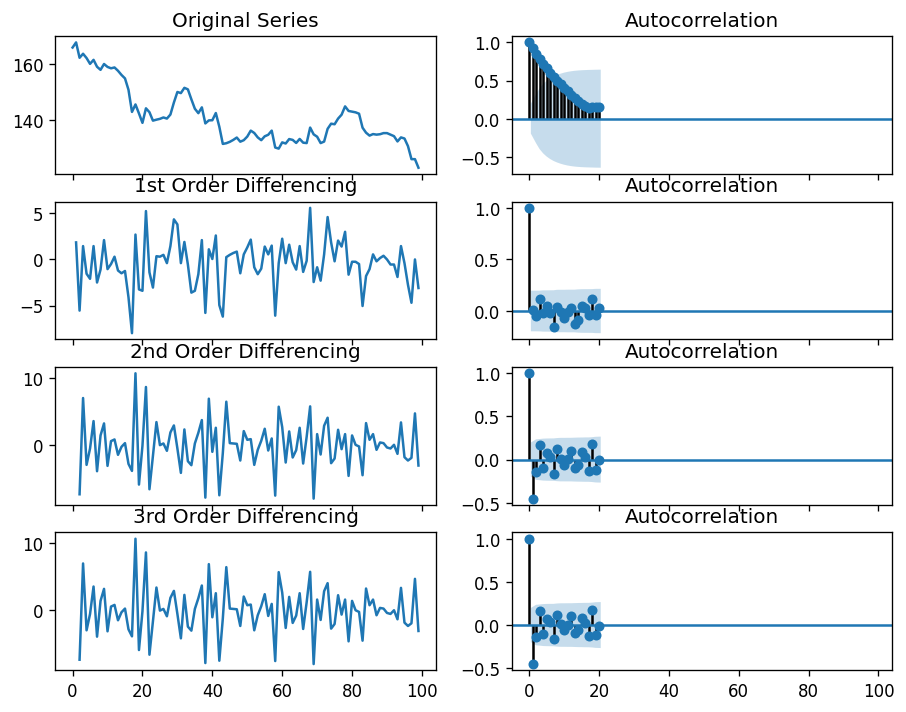

In [11]:
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(data.value); axes[0, 0].set_title('Original Series')
plot_acf(data.value, ax=axes[0, 1])

axes[1, 0].plot(data.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.value.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(data.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.value.diff().diff().dropna(), ax=axes[2, 1])
axes[3, 0].plot(data.value.diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(data.value.diff().diff().dropna(), ax=axes[3, 1])

## From above d= 1

## PACF For getting p value

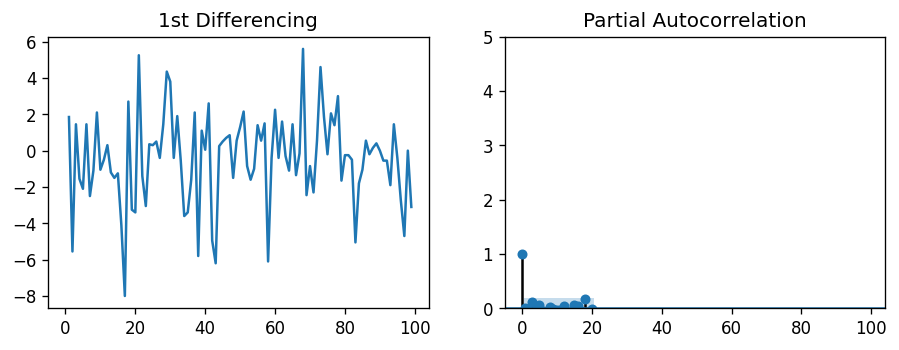

In [12]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.value.diff().dropna(), ax=axes[1])

plt.show()

## From above selecting p=2 

## ACF For value q

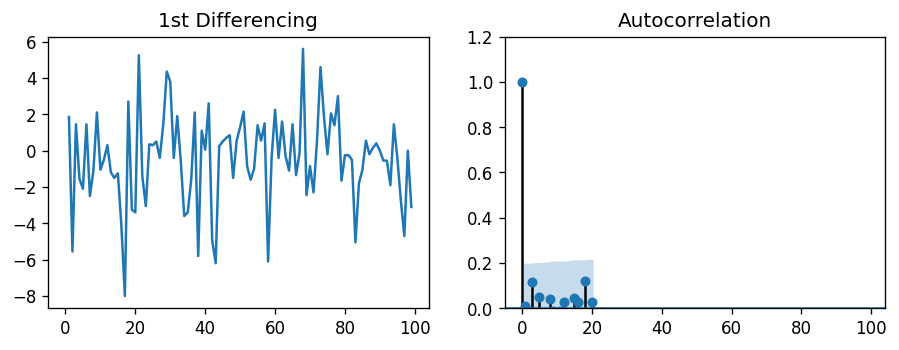

In [13]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data.value.diff().dropna(), ax=axes[1])

plt.show()

## From above q=1 because all significant values are under the range

## Fitting wthout splitting the dataset

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
model= ARIMA(data.value,order=(2,1,1))

In [16]:
fit= model.fit()

In [17]:
print(fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -229.131
Method:                       css-mle   S.D. of innovations              2.448
Date:                Wed, 16 Feb 2022   AIC                            468.261
Time:                        06:09:57   BIC                            481.237
Sample:                             1   HQIC                           473.511
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4361      0.236     -1.844      0.068      -0.900       0.027
ar.L1.D.value    -0.5996      0.300     -1.996      0.049      -1.189      -0.011
ar.L2.D.value    -0.0920      0.107     

## Splitting the datasets into 80:20

In [18]:
train= data.value[:80]
test= data.value[80:]

In [19]:
train

0     166.050003
1     167.899994
2     162.350006
3     163.800003
4     162.250000
         ...    
75    138.350006
76    140.399994
77    141.800003
78    144.800003
79    143.149994
Name: value, Length: 80, dtype: float64

## Fitting the model 

In [20]:
model= ARIMA(train, order=(2,1,1))

In [21]:
fit_1= model.fit()

In [22]:
future_value, se, conf = fit_1.forecast(20, alpha=0.05) 

In [23]:
fv_series = pd.Series(future_value, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [24]:
fv_series

80    142.349143
81    142.606290
82    142.012520
83    141.860322
84    141.521077
85    141.249750
86    140.957486
87    140.670246
88    140.382447
89    140.094335
90    139.806518
91    139.518540
92    139.230632
93    138.942698
94    138.654772
95    138.366844
96    138.078917
97    137.790989
98    137.503062
99    137.215135
dtype: float64

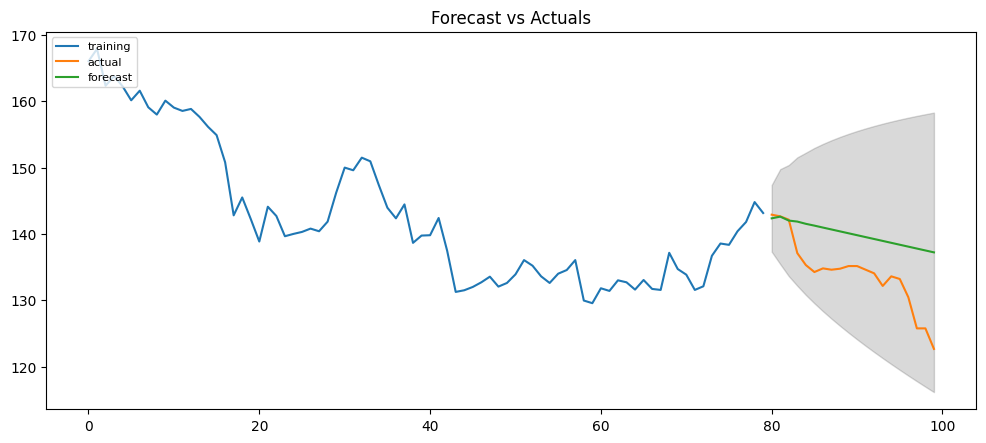

In [25]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fv_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [29]:

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(future_value, test.values)

{'mae': 5.96378936744283,
 'mape': 0.04556259773471719,
 'me': 5.89058651986479,
 'mpe': 0.04504977028324725,
 'rmse': 6.950474106110339}

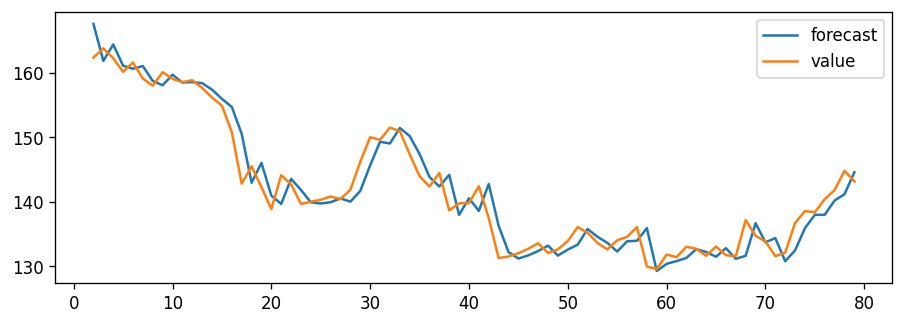

In [27]:
fit_1.plot_predict(dynamic=False)
plt.show()